In [2]:
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Linear Regression

In [3]:
df = pd.read_csv("Google_train_data.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
df['Close'] = df['Close'].str.replace(",","").astype(float)

In [9]:
df['Volume'] = df['Volume'].str.replace(",","").astype(float)

In [13]:
for col in [ 'Open', 'High', 'Low', 'Volume']:
 df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1,1))

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,-1.372855,-1.340653,-1.355794,663.59,1.857776
1,1/4/2012,-1.333209,-1.333854,-1.328483,666.45,1.140122
2,1/5/2012,-1.342692,-1.354253,-1.343036,657.21,1.510102
3,1/6/2012,-1.352505,-1.367198,-1.364366,648.24,0.988988
4,1/9/2012,-1.393995,-1.409566,-1.458855,620.76,3.753349


In [15]:
x=df.drop(['Date','Close'],axis=1)
y=df['Close']

In [16]:
x.head()

,Open,High,Low,Volume
0,-1.372855,-1.340653,-1.355794,1.857776
1,-1.333209,-1.333854,-1.328483,1.140122
2,-1.342692,-1.354253,-1.343036,1.510102
3,-1.352505,-1.367198,-1.364366,0.988988
4,-1.393995,-1.409566,-1.458855,3.753349


In [17]:
y

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predicted = lr.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [22]:
np.sqrt(mean_absolute_error(y_test, y_predicted))

10.496102453745193

In [23]:
rmse

21872.21249600585

In [24]:
r2

0.2198577641971582

# LSTM

In [25]:
#1
data = pd.read_csv("Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [26]:
#2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [27]:
data['Close'] = data['Close'].str.replace(",","").astype(float)
data['Volume'] = data['Volume'].str.replace(",","").astype(float)

In [28]:
data.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [29]:
data=data.dropna()

In [30]:
#3
trainData = data.iloc[:,4:5].values

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
#4
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1258, 1)

In [33]:
#5
x_train = []
y_train = []

for i in range (30,1258):
  x_train.append(trainData[i-30:i,0])
  y_train.append(trainData[i,0])
#6
x_train,y_train = np.array(x_train),np.array(y_train)

In [34]:
#7
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1228, 30, 1)

In [35]:
#8
model = Sequential()
model.add(LSTM(units=200,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(units=150,return_sequences=True))
model.add(LSTM(units=100,return_sequences=True))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=1))
#9
model.compile(optimizer='adam',loss='mean_squared_error')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [36]:
history = model.fit(x_train,y_train ,validation_split=0.2,epochs = 30,batch_size=32,verbose=1,callbacks = es)

Epoch 1/30
31/31 [==============================] - 10s 155ms/step - loss: 0.0344 - val_loss: 0.0106
Epoch 2/30
31/31 [==============================] - 3s 105ms/step - loss: 0.0099 - val_loss: 0.0014
Epoch 3/30
31/31 [==============================] - 3s 106ms/step - loss: 0.0075 - val_loss: 8.2828e-04
Epoch 4/30
31/31 [==============================] - 3s 104ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 5/30
31/31 [==============================] - 3s 105ms/step - loss: 0.0054 - val_loss: 8.6041e-04
Epoch 6/30
31/31 [==============================] - 3s 108ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 7/30
31/31 [==============================] - 4s 113ms/step - loss: 0.0040 - val_loss: 9.2391e-04
Epoch 8/30
31/31 [==============================] - 3s 107ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 8: early stopping


In [37]:
import matplotlib.pyplot as plt

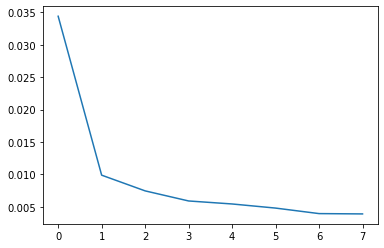

In [38]:
#10
plt.plot(history.history['loss'])

In [39]:
#11
testData=pd.read_csv("Google_test_data.csv")
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[30:,0:].values

In [40]:
testData.shape

(252, 1)

In [41]:
#12
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled =sc.transform(inputClosing)
inputClosing_scaled.shape

(252, 1)

In [42]:
#13
x_test = []
length = len(testData)
timestep = 30


for i in range (timestep,length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape
                    

(222, 30, 1)

In [43]:
#14
y_pred = model.predict(x_test)

7/7 [==============================] - 2s 34ms/step


In [44]:
#15
predicted_price = sc.inverse_transform(y_pred)

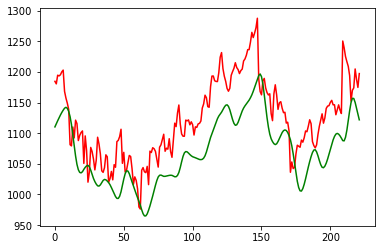

In [45]:
#16
plt.plot(y_test,color='red',label= 'actual')
plt.plot(predicted_price,color = 'green',label='predicted')

In [46]:
#17
np.sqrt(mean_absolute_error(y_test, predicted_price))

7.366349800460342

In [47]:
r2_score(y_test, predicted_price)

0.046001130406687185

In [48]:
#19
last_train_batch = inputClosing_scaled[-30:]

In [49]:
last_train_batch = last_train_batch.reshape((1, 30, 1))

In [50]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 24ms/step


array([[0.85995114]], dtype=float32)

In [51]:
#10
test_predictions = []

first_eval_batch = inputClosing_scaled[-30:]
current_batch = first_eval_batch.reshape((1, 30, 1))

for i in range(10):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [52]:
true_predictions = sc.inverse_transform(test_predictions)

In [53]:
true_predictions.shape

(10, 1)

In [54]:
inputClosing_scaled.shape

(252, 1)

In [55]:
len(predicted_price)

222

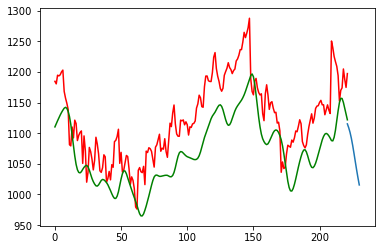

In [56]:
plt.plot(y_test,color='red',label= 'actual')
plt.plot(predicted_price,color = 'green',label='predicted')
plt.plot(np.arange(221,231),true_predictions)

ARIMA for future prediction

In [57]:
#1
!pip install pmdarima


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pandas as pd
import numpy as np

In [59]:
#2
data=pd.read_csv("Google_train_data.csv")

In [60]:
data['Close'] = data['Close'].str.replace(",","").astype(float)
data['Volume'] = data['Volume'].str.replace(",","").astype(float)

In [61]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


In [62]:
#3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [63]:
df = data[["Close"]].copy()

In [64]:
df.describe()

,Close
count,1258.000000
mean,712.669666
std,164.752591
min,491.200000
25%,576.740000
50%,695.675000
75%,782.105000
max,1216.830000


In [65]:
# Check if close price series is stationary
#4
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.061466444884648
p-value: 0.26028863381054135


In [66]:
#5
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [67]:
#6
step_fit = auto_arima(df.Close,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11003.918, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10998.027, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10998.534, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10998.533, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10996.053, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11000.535, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.683 seconds


In [68]:
#7
train= df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1228, 1) (30, 1)


In [69]:
#8
import statsmodels.api as sm

In [70]:
#9
model = sm.tsa.arima.ARIMA(df.Close, order=(0, 1, 0))
result = model.fit()

In [71]:

step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5497.026
Date:                Thu, 17 Aug 2023   AIC                          10996.053
Time:                        16:13:55   BIC                          11001.189
Sample:                             0   HQIC                         10997.983
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       368.1129      0.828    444.739      0.000     366.491     369.735
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):          20734342.34
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                           -20.81
Prob(H) (two-sided):                  0.00   Kurtosis:                       630.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
#10
start = len(train)
end=len(train)+len(test)-1
pred = result.predict(start=start,end=end)
print(pred)

1228    764.48
1229    771.23
1230    760.54
1231    769.20
1232    768.27
1233    760.99
1234    761.68
1235    768.24
1236    770.84
1237    758.04
1238    747.92
1239    750.50
1240    762.52
1241    759.11
1242    771.19
1243    776.42
1244    789.29
1245    789.27
1246    796.10
1247    797.07
1248    797.85
1249    790.80
1250    794.20
1251    796.42
1252    794.56
1253    791.26
1254    789.91
1255    791.55
1256    785.05
1257    782.79
Name: predicted_mean, dtype: float64


<AxesSubplot:>

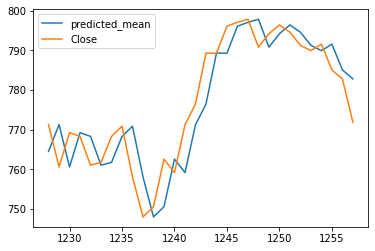

In [73]:
#11
pred.plot(legend=True)
test.Close.plot(legend=True)

In [74]:
#12
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(test.Close,pred))

6.8504316165723065

In [75]:
r2_score(test.Close, pred)

0.7959646958554926

In [76]:
#13

In [77]:
test_df=pd.read_csv("Google_test_data.csv")

In [78]:
model = sm.tsa.arima.ARIMA(test_df.Close, order=(0, 1, 0))
result = model.fit()

In [79]:
#14
prediction = result.predict(start=len(test_df),end=len(test_df)+10)

<AxesSubplot:>

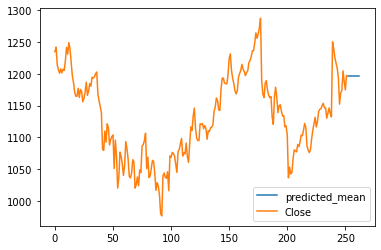

In [80]:
prediction.plot(legend=True)
test_df.Close.plot(legend=True)